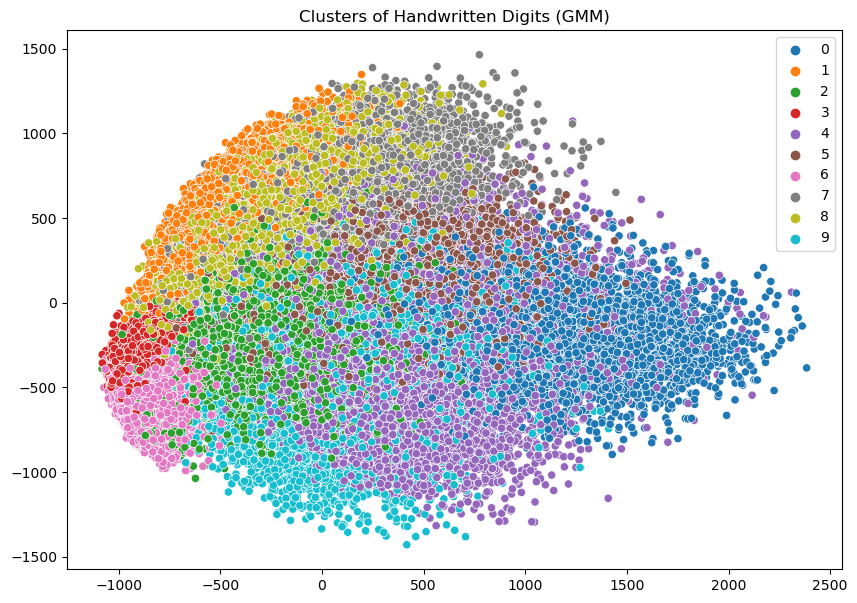

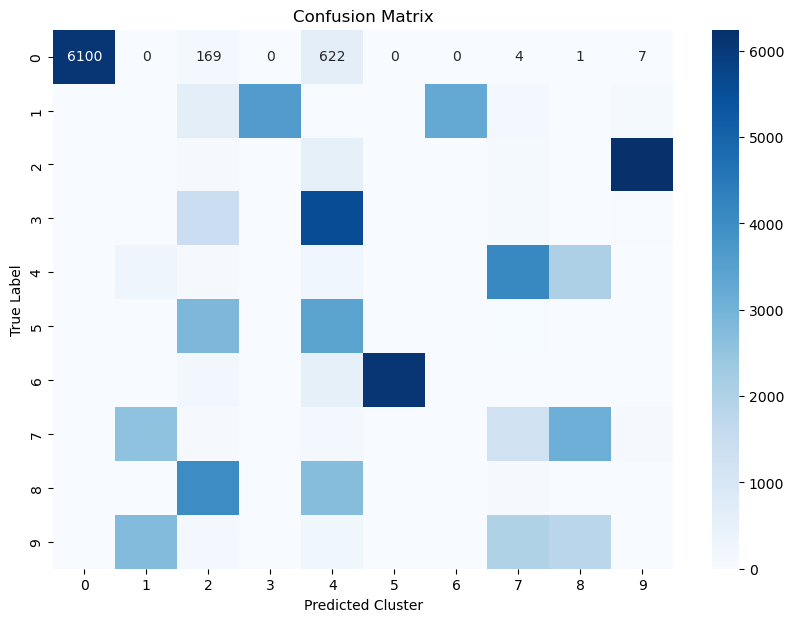

In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Shaikh Irfan\Downloads\drive-download-20250419T131102Z-001\mnist [GRP A4 B4].csv")  # replace with your actual file path

# Separate features and labels
X = df.drop("label", axis=1).values
y_true = df["label"].values

# Reduce to 50 dimensions for better clustering (optional)
pca = PCA(n_components=50, random_state=42)
X_reduced = pca.fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(X_reduced)

# Predict clusters
y_pred = gmm.predict(X_reduced)

# Further reduce to 2D for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_reduced)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_pred, palette='tab10', legend='full')
plt.title("Clusters of Handwritten Digits (GMM)")
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix between predicted cluster and actual digit
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
